# Data Science Job Salaries

Importando bibliotecas.

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importando a base de dados do projeto.

In [330]:
data_b = pd.read_csv("data/ds_salaries.csv", index_col=0)
data_b.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Verificando a existência de valores null.

In [331]:
data_b.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Verficando os tipos das colunas.

In [332]:
data_b.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

O ano em que o salário foi pago.

In [333]:
data_b["work_year"].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

O nível de experiência no trabalho durante o ano com os seguintes valores possíveis:
* EN = Entry-level / Junior
* MI = Mid-level / Intermediate
* SE = Senior-level / Expert
* EX = Executive-level / Director

In [334]:
data_b["experience_level"].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

Mudando o nível de experiência para valores numéricos:
* SE = 0
* MI = 1
* EN = 2
* EX = 3

In [335]:
data_b["experience_level"] = data_b["experience_level"].map({"EN": 0, "MI": 1, "SE": 2, "EX": 3})
data_b["experience_level"].value_counts()

2    280
1    213
0     88
3     26
Name: experience_level, dtype: int64

O tipo de emprego para a função:
* PT = Part-time
* FT = Full-time
* CT = Contract
* FL = Freelance

In [336]:
data_b["employment_type"].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

Mudando o tipo de emprego para valores numéricos:
* PT = 0
* FT = 1
* CT = 2
* FL = 3

In [337]:
data_b["employment_type"] = data_b["employment_type"].map({"PT": 0, "FT": 1, "CT": 2, "FL": 3})
data_b["employment_type"].value_counts()

1    588
0     10
2      5
3      4
Name: employment_type, dtype: int64

O cargo que trabalhou durante o ano:

In [338]:
data_b["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

Dividindo em profissões:
* Scientist = 0
* Engineer = 1
* Analyst = 2
* Manager = 3
* Director = 4
* Architect = 5
* Consultant = 6
* Head = 7
* Developer = 8
* Lead = 9
* Researcher = 10
* Specialist = 11

In [339]:
profession_b = []

for job_title in data_b["job_title"]:
  if "Scientist" in job_title:
    profession_b.append(0)
  elif "Engineer" in job_title:
    profession_b.append(1)
  elif "Analyst" in job_title:
    profession_b.append(2)
  elif "Manager" in job_title:
    profession_b.append(3)
  elif "Director" in job_title:
    profession_b.append(4)
  elif "Architect" in job_title:
    profession_b.append(5)
  elif "Consultant" in job_title:
    profession_b.append(6)
  elif "Head" in job_title:
    profession_b.append(7)
  elif "Developer" in job_title:
    profession_b.append(8)
  elif "Lead" in job_title:
    profession_b.append(9)
  elif "Researcher" in job_title:
    profession_b.append(10)
  elif "Specialist" in job_title:
    profession_b.append(11)

# Incluindo os dados na tabela
data_b["profession"] = profession_b

data_b["profession"].value_counts()

1     230
0     194
2     119
3      20
5      12
7      10
6       7
4       7
8       5
10      1
11      1
9       1
Name: profession, dtype: int64

Dividindo por áreas:
* Machine Learning = 0
* Big Data = 1
* Computer Vision = 2
* AI and NLP = 3
* Cloud = 4
* ETL = 5
* Business Intelligence = 6
* Geral = 7


In [340]:
areas_b = []

for job_title in data_b["job_title"]:
    if ("Machine Learning" in job_title) or ("ML" in job_title):
        areas_b.append(0)
    elif "Big Data" in job_title:
        areas_b.append(1)
    elif "Computer Vision" in job_title:
        areas_b.append(2)
    elif ("AI" in job_title) or ("NLP" in job_title):
        areas_b.append(3)
    elif "Cloud" in job_title:
        areas_b.append(4)
    elif "ETL" in job_title:
        areas_b.append(5)
    elif ("Business" in job_title) or ("BI" in job_title):
        areas_b.append(6)
    else:
        areas_b.append(7)

data_b["area"] = areas_b
data_b["area"].value_counts()

7    497
0     68
6     11
2     10
1      9
3      8
4      2
5      2
Name: area, dtype: int64

Deletando os títulos de trabalho

In [341]:
data_b = data_b.drop(columns="job_title")

A moeda do salário pago como um código de moeda ISO 4217:

In [342]:
data_b["salary_currency"].value_counts() # pensar uma forma de converter automaticamente

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64

Mudando a moeda do salário:
* USD = 0
* EUR = 1
* GBP = 2
* INR = 3
* CAD = 4
* JPY = 5
* PLN = 6
* TRY = 7
* CNY = 8
* MXN = 9
* HUF = 10
* DKK = 11
* SGD = 12
* BRL = 13
* AUD = 14
* CLP = 15
* CHF = 16

In [343]:
currencys_b = []

for currency in data_b["salary_currency"]:
    if currency == "USD":
        currencys_b.append(0)
    elif currency == "EUR":
        currencys_b.append(1)
    elif currency == "GBP":
        currencys_b.append(2)
    elif currency == "INR":
        currencys_b.append(3)
    elif currency == "CAD":
        currencys_b.append(4)
    elif currency == "JPY":
        currencys_b.append(5)
    elif currency == "PLN":
        currencys_b.append(6)
    elif currency == "TRY":
        currencys_b.append(7)
    elif currency == "CNY":
        currencys_b.append(8)
    elif currency == "MXN":
        currencys_b.append(9)
    elif currency == "HUF":
        currencys_b.append(10)
    elif currency == "DKK":
        currencys_b.append(11)
    elif currency == "SGD":
        currencys_b.append(12)
    elif currency == "BRL":
        currencys_b.append(13)
    elif currency == "AUD":
        currencys_b.append(14)
    elif currency == "CLP":
        currencys_b.append(15)
    elif currency == "CHF":
        currencys_b.append(16)

data_b["salary_currency"] = currencys_b
data_b["salary_currency"].value_counts()

0     398
1      95
2      44
3      27
4      18
5       3
6       3
7       3
8       2
9       2
10      2
11      2
12      2
13      2
14      2
15      1
16      1
Name: salary_currency, dtype: int64

O principal país de residência do funcionário durante o ano de trabalho como um código de país ISO 3166.

In [344]:
data_b["employee_residence"].value_counts() # dividir por continentes

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

Mudando os códigos de países para inteiros

In [345]:
countries_b = data_b["employee_residence"].unique()
print(countries_b)

i = 0
employee_residence_b = []

for country in data_b["employee_residence"]:
    for codigo in countries_b:
        if country == codigo:
            employee_residence_b.append(i)
        i += 1
    i = 0

data_b["employee_residence"] = employee_residence_b
data_b["employee_residence"].value_counts()

['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'PL' 'PT' 'CN' 'GR'
 'AE' 'NL' 'MX' 'CA' 'AT' 'NG' 'PH' 'ES' 'DK' 'RU' 'IT' 'HR' 'BG' 'SG'
 'BR' 'IQ' 'VN' 'BE' 'UA' 'MT' 'CL' 'RO' 'IR' 'CO' 'MD' 'KE' 'SI' 'HK'
 'TR' 'RS' 'PR' 'LU' 'JE' 'CZ' 'AR' 'DZ' 'TN' 'MY' 'EE' 'AU' 'BO' 'IE'
 'CH']


4     332
2      44
8      30
17     29
0      25
7      18
21     15
13     13
1       7
11      6
28      6
9       6
15      5
10      4
24      4
23      4
14      3
18      3
30      3
42      3
53      3
35      2
31      2
27      2
40      2
22      2
5       2
19      2
16      2
54      1
51      1
50      1
55      1
49      1
48      1
47      1
46      1
45      1
44      1
43      1
52      1
34      1
41      1
39      1
38      1
37      1
36      1
12      1
33      1
32      1
29      1
3       1
26      1
25      1
20      1
6       1
56      1
Name: employee_residence, dtype: int64

A quantidade total de trabalho feito remotamente, os valores possíveis são os seguintes:
* 0 = Sem trabalho remoto (menos 20%)
* 50 = Parcialmemte remoto
* 100 = Totalmente remoto (mais de 80%)

In [346]:
data_b["remote_ratio"].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

O país da sede ou filial contratante do empregador como um código de país ISO 3166.

In [347]:
data_b["company_location"].value_counts() # dividir por continentes

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

Mudando os códigos de países para inteiros

In [348]:
countries_b = data_b["company_location"].unique()
print(countries_b)

i = 0
company_location_b = []

for country in data_b["company_location"]:
    for codigo in countries_b:
        if country == codigo:
            company_location_b.append(i)
        i += 1
    i = 0

data_b["company_location"] = company_location_b
data_b["company_location"].value_counts()

['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'CN' 'GR' 'AE' 'NL'
 'MX' 'CA' 'AT' 'NG' 'ES' 'PT' 'DK' 'IT' 'HR' 'LU' 'PL' 'SG' 'RO' 'IQ'
 'BR' 'BE' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'CO' 'MD' 'KE' 'SI' 'CH' 'VN'
 'AS' 'TR' 'CZ' 'DZ' 'EE' 'MY' 'AU' 'IE']


4     355
2      47
15     30
0      28
8      24
7      15
18     14
11     11
1       6
13      4
16      4
19      4
24      4
23      3
9       3
28      3
12      3
14      3
48      3
43      3
20      3
21      2
44      2
39      2
32      2
40      2
17      2
10      2
29      2
41      1
46      1
42      1
45      1
47      1
37      1
38      1
25      1
36      1
35      1
34      1
33      1
31      1
30      1
27      1
26      1
22      1
6       1
5       1
3       1
49      1
Name: company_location, dtype: int64

O número médio de pessoas que trabalharam para a empresa durante o ano:
* S = mais de 50 trabalhadores (small)
* M = de 50 a 250 trabalhadores (medium)
* L = mais de 250 trabalhadores (large)

In [349]:
data_b["company_size"].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

Mudando o tamanho da empresa para valores numéricos:
* S = 0
* M = 1
* L = 2

In [350]:
data_b["company_size"] = data_b["company_size"].map({"S": 0, "M": 1, "L": 2})
data_b["company_size"].value_counts()

1    326
2    198
0     83
Name: company_size, dtype: int64

In [351]:
data_b.head()

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,profession,area
0,2020,1,1,70000,1,79833,0,0,0,2,0,7
1,2020,2,1,260000,0,260000,1,0,1,0,0,0
2,2020,2,1,85000,2,109024,2,50,2,1,1,1
3,2020,1,1,20000,0,20000,3,0,3,0,2,7
4,2020,2,1,150000,0,150000,4,50,4,2,1,0


<AxesSubplot:>

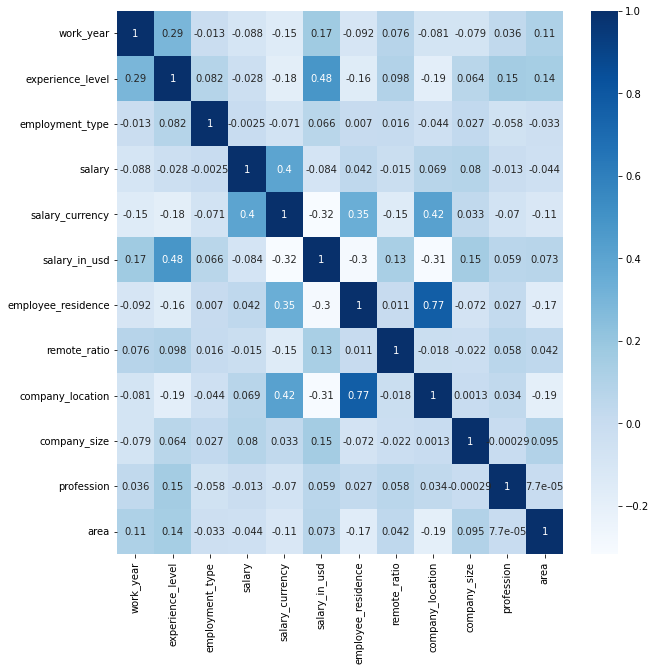

In [352]:
correlação = data_b.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlação, annot=True, cmap="Blues")

# Funções de Gráficos

In [353]:
def univariate_multi_plot(df=data_b, x=None, xlabel=None, explode=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.countplot(data=df, x=x, ax=ax[0], order=df[x].value_counts(ascending=True).index)
    df[x].value_counts(ascending=True).plot(kind="pie", autopct="%1.1f%%", ax=ax[1], explode=explode)
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    ax[0].bar_label(ax[0].containers[0], label_type='edge', size=12, padding=1, fontname="Helvetica, Ariel", 
                    color="#7f7f7f")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, ha="center", va="center")
    plt.show()

def univariate_single_plot(df=data_b, x=None, xlabel=None, rotation=None, bar_label=False):
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    sns.countplot(data=df, x=x, order=df[x].value_counts(ascending=True).index)
    sns.despine(bottom=True, left=True)
    plt.xlabel(xlabel=xlabel, size=14)
    plt.xticks(rotation=rotation)
    plt.ylabel(ylabel="")
    if bar_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=10, padding=1, fontname="Helvetica, Ariel", 
                        color="#7f7f7f")
    plt.title(label=f'{xlabel} Distribution', size=18)
    plt.show()
    
    
def univariate_numerical_plot(df=data_b, x=None, xlabel=None, bar_label=True):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.histplot(data=df, x=x, kde=True, ax=ax[0])
    sns.boxplot(data=df, x=x, ax=ax[1])
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12)
    ax[1].set_xlabel(xlabel=xlabel, size=12)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, ha="center", va="center")
    plt.show()

# Work Year

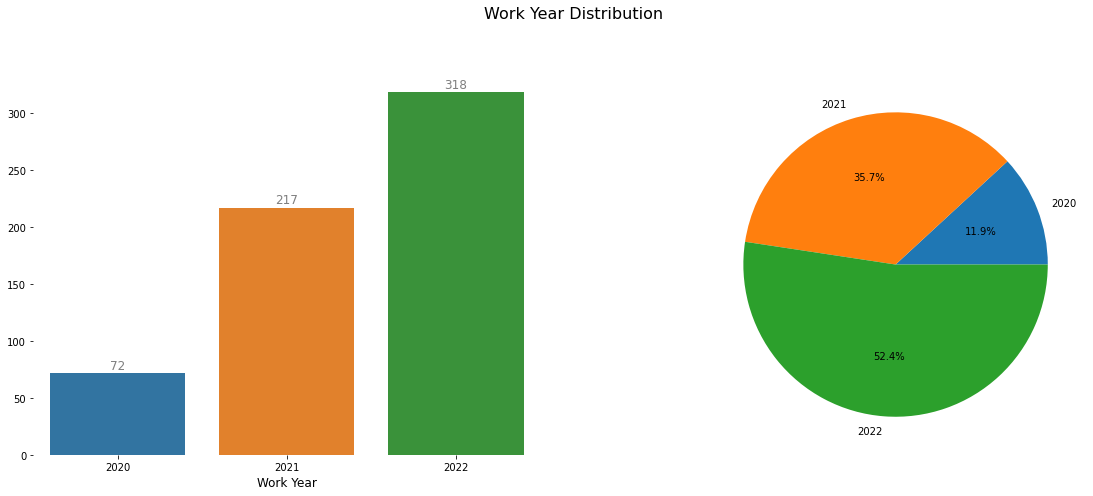

In [354]:
univariate_multi_plot(x="work_year", xlabel="Work Year")

# Experience Level

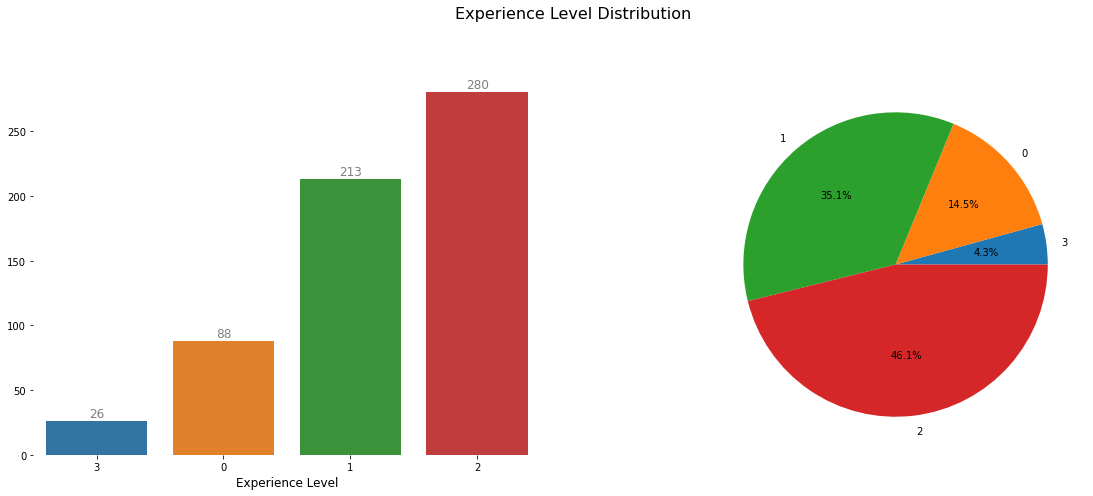

In [355]:
univariate_multi_plot(x="experience_level", xlabel="Experience Level")

# Employment Type

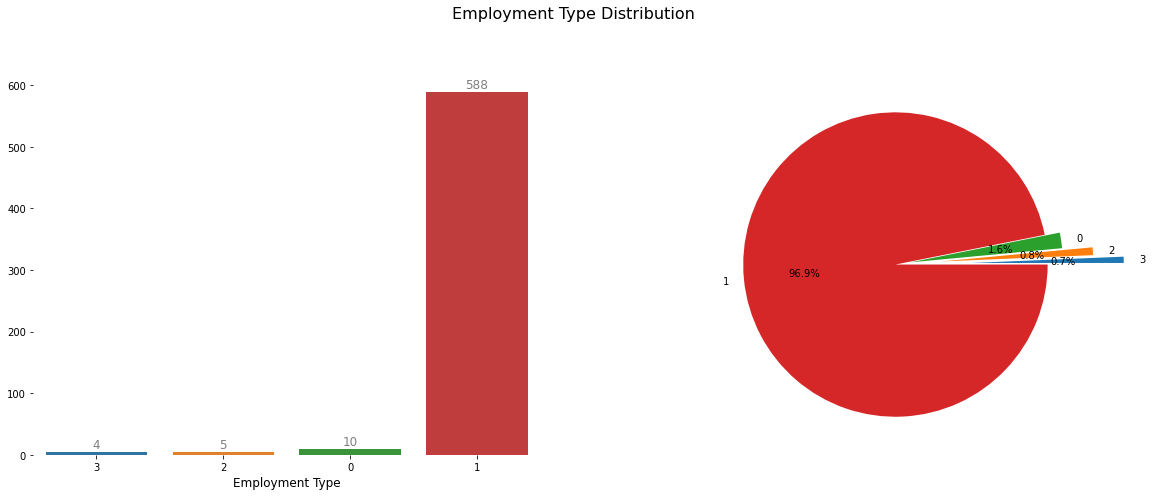

In [356]:
univariate_multi_plot(x="employment_type", xlabel="Employment Type", explode=(0.5, 0.3, 0.1, 0))

# Remote Ratio

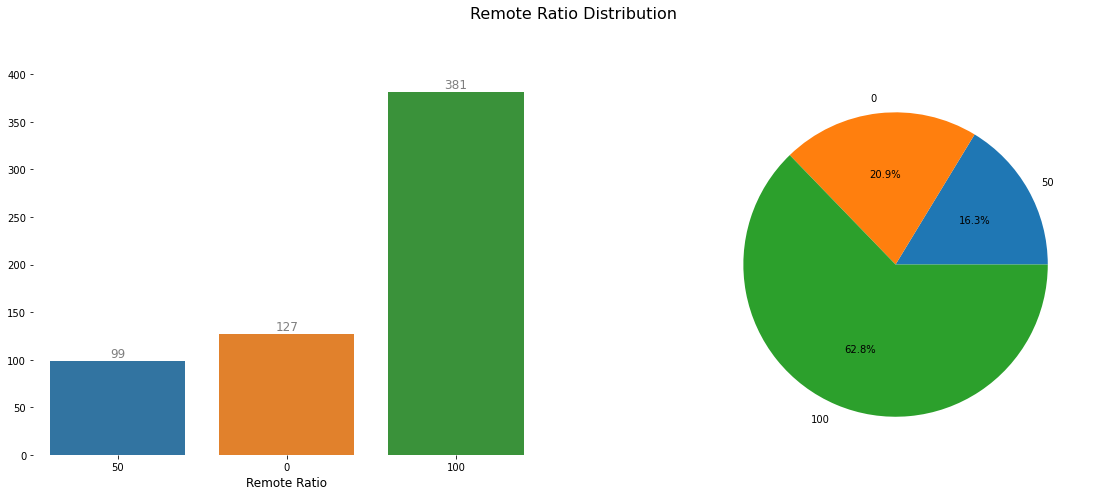

In [357]:
univariate_multi_plot(x="remote_ratio", xlabel="Remote Ratio")

# Company Size

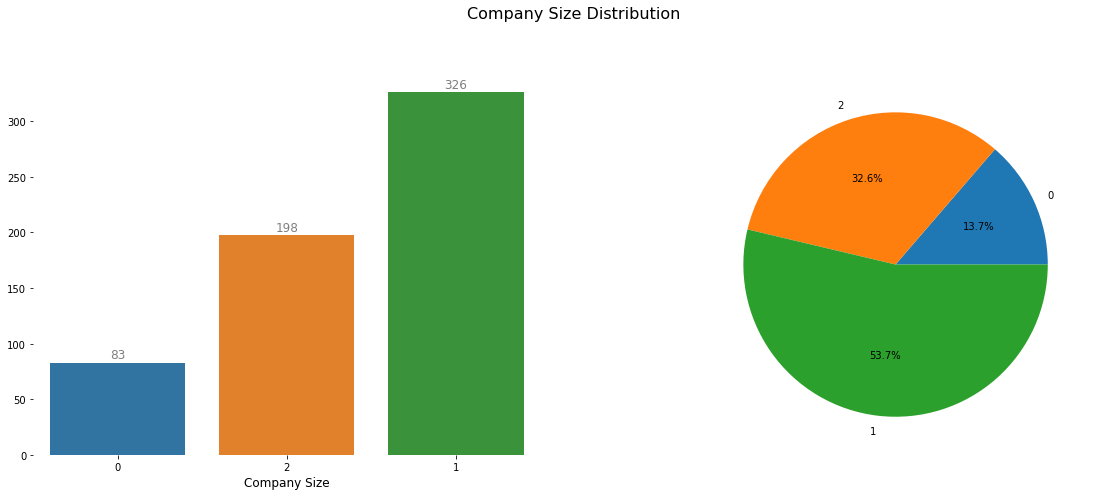

In [358]:
univariate_multi_plot(x="company_size", xlabel="Company Size")

# Salary in USD

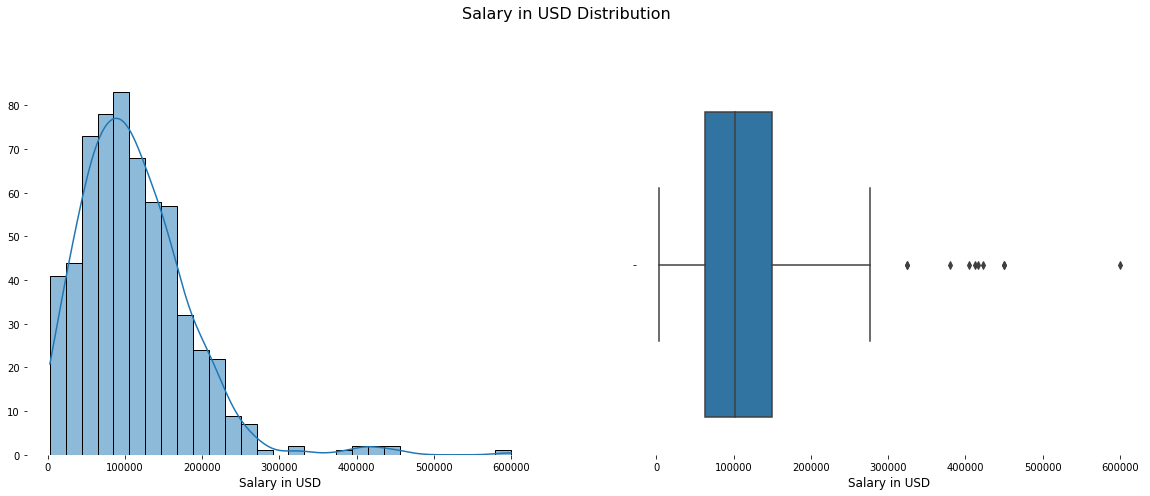

In [359]:
univariate_numerical_plot(x="salary_in_usd", xlabel="Salary in USD")